In [21]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns

from fsk.dataprep.utils import get_synsets_ids
from fsk.it_match.load import get_concept_match_distance, get_match

In [3]:
project_path = Path('/Users/m_vilas/projects/fsk-multimodal')
res_path = project_path / 'results/'
image_path = project_path / 'dataset/things/object_images'

In [4]:
# Synsets and Concepts data
synsets_imgs, concepts = get_synsets_ids(project_path / 'dataset')

In [5]:
models = ['clip', 'albef', 'vilt']

                                  Predictions
c1              c2                           
cucumber-n-02   zucchini-n-02        5.875965
ax-n-01         hatchet-n-02         5.483931
clarinet-n-01   flute-n-01           5.136011
cello-n-01      violin-n-01          4.928914
orange-n-01     wall-n-01            4.908881
calf-n-01       cow-n-01             4.868823
crowbar-n-01    tongs-n-01           4.795852
cart-n-01       wagon-n-01           4.791868
bull-n-01       cow-n-01             4.775929
chipmunk-n-01   squirrel-n-01        4.750028
rule-n-12       thermometer-n-01     4.721292
microwave-n-02  oven-n-01            4.614547
lime-n-06       wall-n-01            4.611274
cheetah-n-01    leopard-n-02         4.560370
mat-n-01        rug-n-01             4.554918
fork-n-01       spatula-n-01         4.545810
peacock-n-02    pheasant-n-01        4.526385
beet-n-02       radish-n-01          4.481656
belt-n-02       buckle-n-01          4.447330
raspberry-n-02  strawberry-n-01   

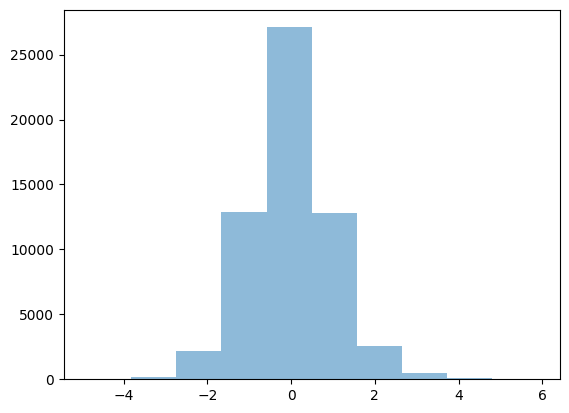

                                 Predictions
c1               c2                         
clarinet-n-01    flute-n-01         6.287494
ax-n-01          hammer-n-02        6.154957
                 hatchet-n-02       6.071180
octopus-n-02     squid-n-02         5.938859
revolver-n-01    rifle-n-01         5.723601
prune-n-01       raisin-n-01        5.582863
catfish-n-03     eel-n-02           5.528443
mouse-n-01       mouse-n-04         5.522377
hoe-n-01         shovel-n-01        5.463703
hammer-n-02      hatchet-n-02       5.437875
ladle-n-01       spoon-n-01         5.436140
cello-n-01       violin-n-01        5.328983
dagger-n-01      sword-n-01         5.312913
bagpipe-n-01     wand-n-01          5.292045
mouse-n-01       rat-n-01           5.267897
gun-n-01         rifle-n-01         5.231635
bow-n-04         slingshot-n-01     5.226005
                 crossbow-n-01      5.125742
tank-n-01        tank-n-02          5.122315
chipmunk-n-01    squirrel-n-01      5.113256
bow-n-01  

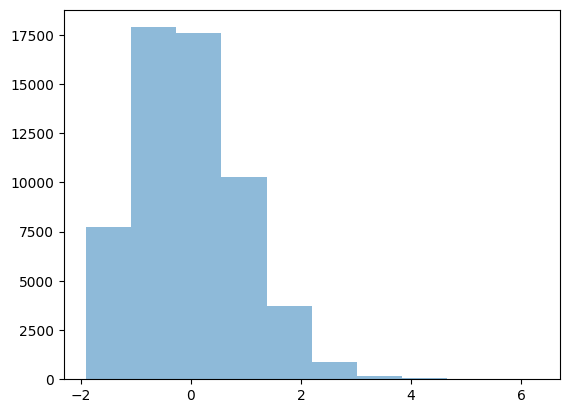

                                  Predictions
c1              c2                           
cello-n-01      harp-n-01            3.747111
                violin-n-01          3.717911
ax-n-01         dagger-n-01          3.712391
grapefruit-n-02 peach-n-03           3.673254
clam-n-01       coconut-n-02         3.654701
dagger-n-01     rule-n-12            3.623132
lobster-n-02    octopus-n-02         3.611948
cello-n-01      trombone-n-01        3.607389
ax-n-01         slingshot-n-01       3.598292
lobster-n-02    squid-n-02           3.594503
cranberry-n-02  grape-n-01           3.581150
cup-n-01        mug-n-04             3.559491
cello-n-01      guitar-n-01          3.556619
orange-n-01     peach-n-03           3.549791
dagger-n-01     slingshot-n-01       3.548359
pepper-n-03     raisin-n-01          3.493836
                walnut-n-01          3.493727
beetle-n-01     spider-n-01          3.480354
beehive-n-02    caterpillar-n-01     3.469772
cello-n-01      clarinet-n-01     

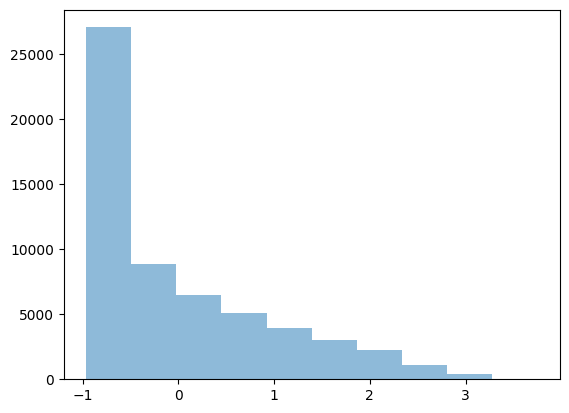

In [13]:
for m in models:
    preds, labels = get_concept_match_distance(res_path, m, synsets_imgs)
    df = pd.DataFrame(
        preds, columns=['Predictions'], 
        index=pd.MultiIndex.from_tuples(labels, names=['c1', 'c2'])
    )
    print(df.sort_values(by='Predictions', ascending=False)[:30])
    plt.hist(preds, alpha=0.5, label=f'{m}')
    plt.show()

In [14]:
preds.shape

(58311,)

In [7]:
preds.shape

(58311,)

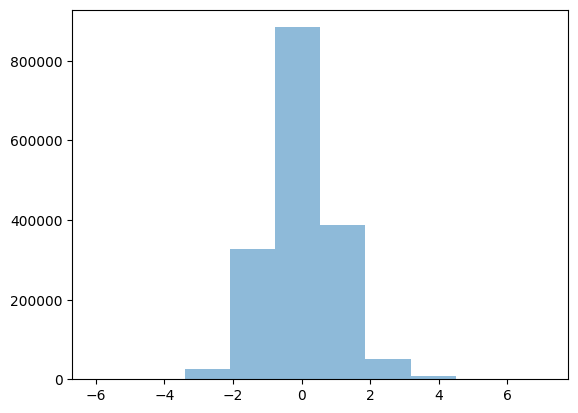

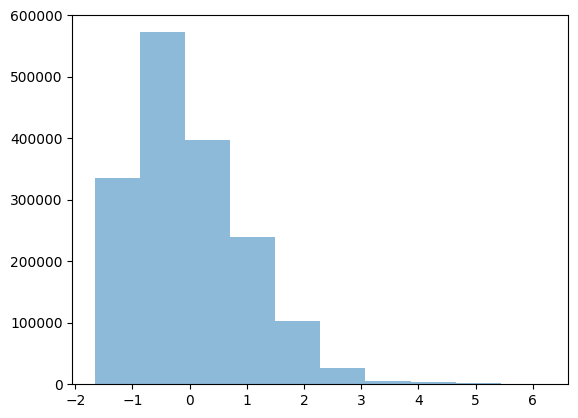

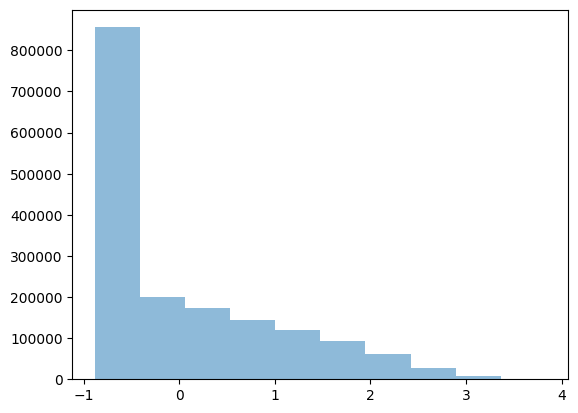

In [15]:
for m in models:
    match, labels = get_match(
        res_path, m, synsets_imgs, m_type='concept', avg=False
    )
    plt.hist(match.reshape(-1), alpha=0.5, label=f'{m}')
    plt.show()

(array([186.,  20.,  28.,  27.,  20.,  19.,  22.,   9.,   7.,   4.]),
 array([-0.86787217, -0.4626258 , -0.05737942,  0.34786695,  0.75311332,
         1.1583597 ,  1.56360607,  1.96885244,  2.37409882,  2.77934519,
         3.18459156]),
 <BarContainer object of 10 artists>)

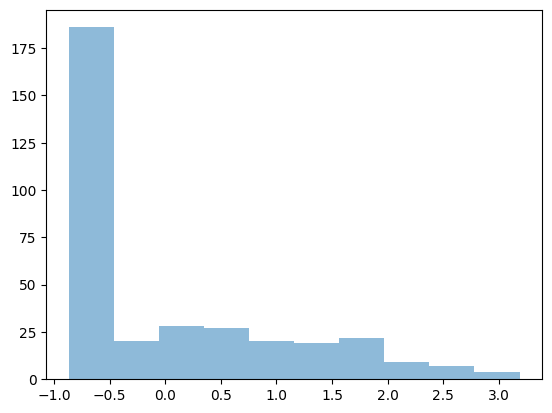

In [20]:
plt.hist(match[6], alpha=0.5, label=f'{m}')

## To-Do
- See how correlated the taxonomic invariances of CLIP are with the visual ones, in both streams. And compare with ViLT too.